<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/preprocess_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Smoothing the image

Sometimes, smoothing the borders to prevent noise on the eges is needed.


In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip3 install -q -U opencv-python
!pip3 install -q matplotlib
!pip3 install -q numpy
!pip3 install -q requests

In [0]:
#Import the libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

## Download images

To use the github images, first download the image to local folder.

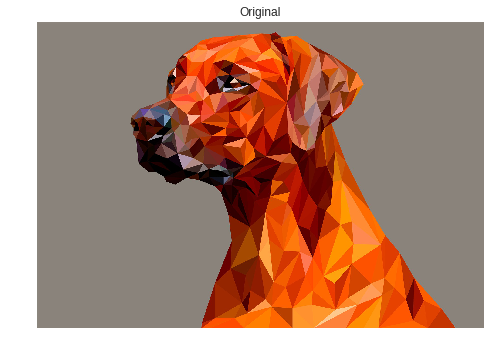

In [9]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://raw.githubusercontent.com/JaledMC/Learning-Artificial-Vision/master/images/dog.jpg')
img = Image.open(BytesIO(response.content))
img.save("origami.png")
# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
axes.imshow(img)
axes.set_title('Original')
plt.axis("off");

image = cv2.imread('origami.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

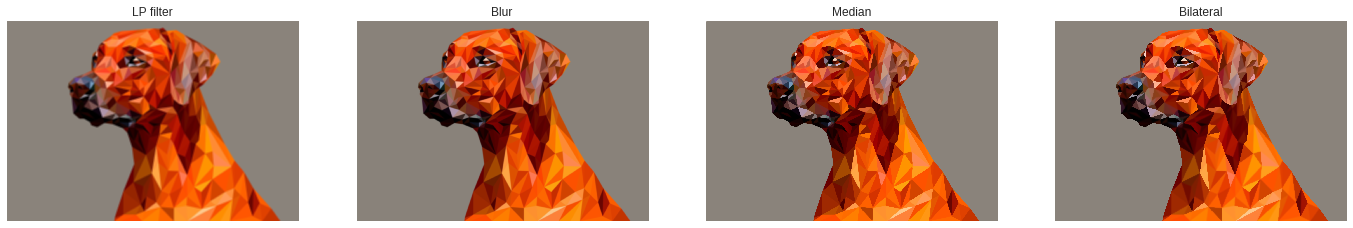

In [10]:
# low pass filter smooth the image changing the values for the kernel area average
kernel = np.ones((15, 15),np.float32)/225 # area to calculate the average
smoothed = cv2.filter2D(image,-1, kernel)  # src, depth(-1 same as the src), area
# same concept with gaussian operation
blur = cv2.GaussianBlur(image, (15, 15), 0)  # src, area, deviation
# central element of the kernel is changedwith the median value of the area
median = cv2.medianBlur(image, 15)  # src, area
# like gaussian, but transform only pixels with same intensity values. Because of that,
# is highly effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 15, 75, 75)

"""d	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
sigmaColor	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
sigmaSpace	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace. 
"""
fig, axes = plt.subplots(1, 4, figsize=(24, 24))
axes[0].imshow(smoothed, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('LP filter')
axes[1].imshow(blur, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Blur')
axes[2].imshow(median, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Median')
axes[3].imshow(bilateral, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Bilateral')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

## Morphological Transformations

To remove the noise, or fill holes in the image. Usually a couple of iterations are needed.


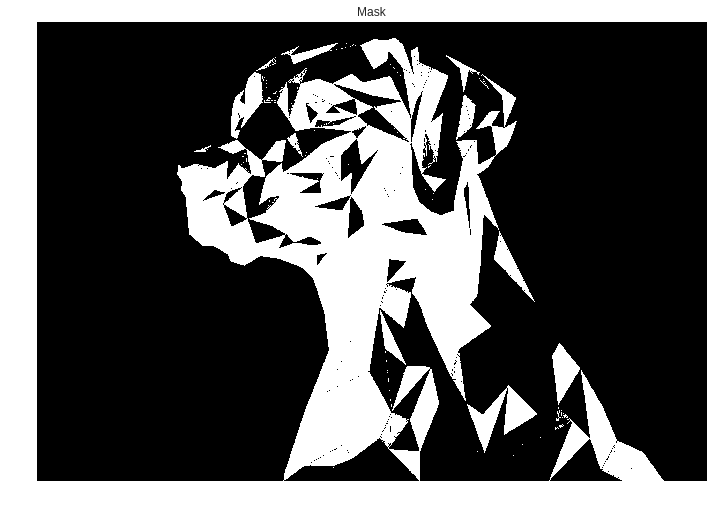

In [20]:
_, mask = cv2.threshold(image_gray, 70, 255, cv2.THRESH_BINARY)

# Represent the image
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
axes.imshow(mask)
axes.set_title('Mask')
plt.axis("off");

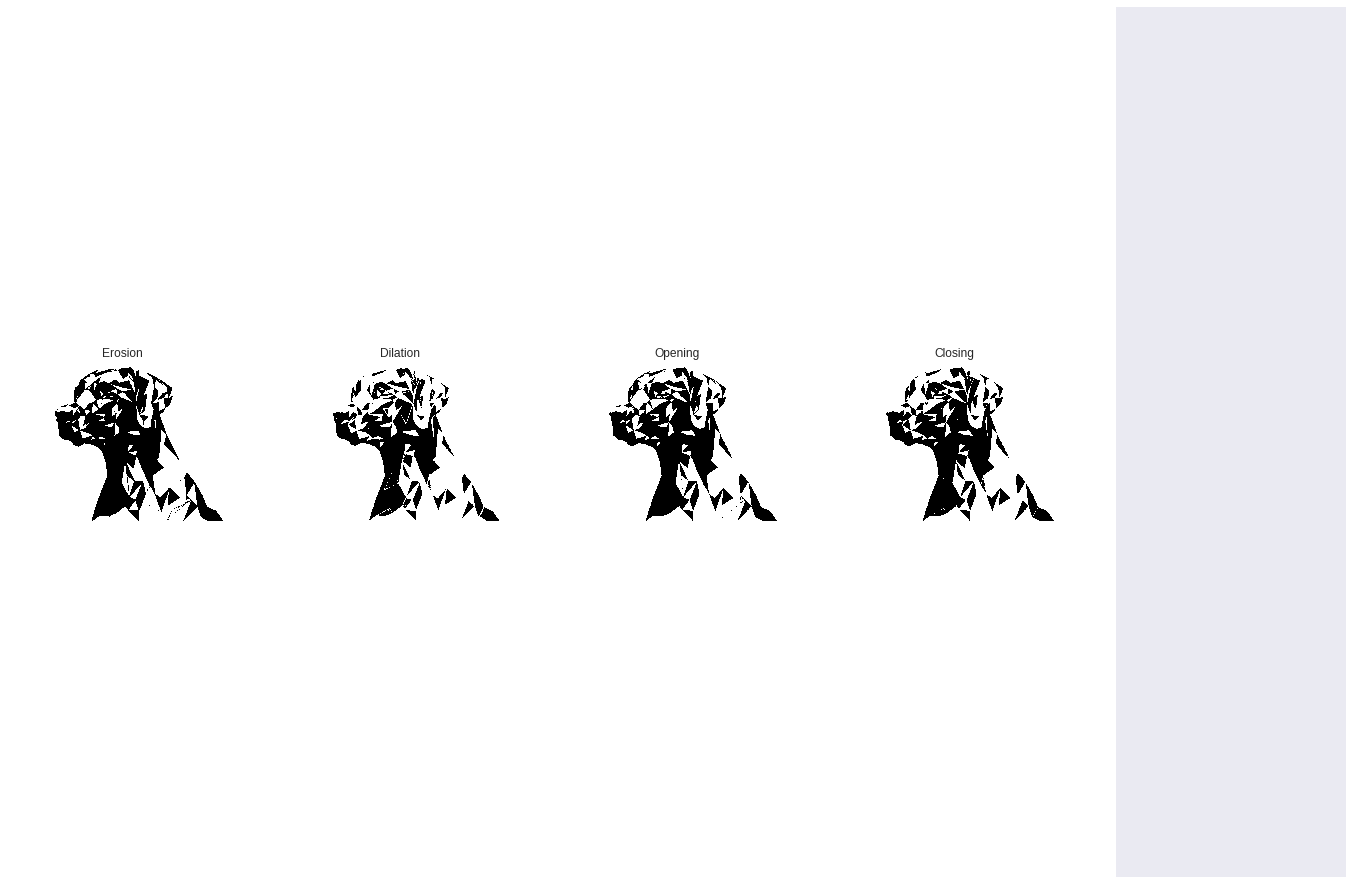

In [23]:
kernel = np.ones((5,5),np.float32)/225
erosion = cv2.erode(mask, kernel, iterations = 1)
dilation = cv2.dilate(mask, kernel, iterations = 1)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 5, figsize=(24, 16))
axes[0].imshow(erosion, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Erosion')
axes[1].imshow(dilation, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Dilation')
axes[2].imshow(opening, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Opening')
axes[3].imshow(closing, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Closing')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])